# K-Means聚类
## 算法流程
1. 随机选取k个样本，作为簇中心；
2. 根据欧式距离，将样本划分到距离最近的簇中（样本到簇心的距离）；
3. 重新计算簇的簇中心；
4. 不断重复计算2,3步，直到簇中心不再发生变化（或者达到一定的迭代次数时停止）。

## 手写K-Means
### 相关函数定义

In [30]:
import random
import pandas as pd
import numpy as np

#### 欧式距离

$$
P(x_0,y_0), Q(x,y)
$$

$$
d = \sqrt{(x - x_0)^2+(y-y_0)^2}
$$

In [31]:
def euclidean(center, point):
    distance = np.sqrt(np.sum((center-point)**2)) 
    return distance

#### 计算簇中心

$$
\overline{x} =\frac{\sum_{i=1}^{N}{x_i}}{N},\quad \overline{y} =\frac{\sum_{i=1}^{N}{y_i}}{N}
$$

In [32]:
def calculate_center(points):
    a = np.array(points)
    center = np.sum(a,axis=0)/len(points)
    return tuple(center)

#### 计算每个簇的簇中心

In [33]:
def calculate_centers(clusters : dict):
    '''
    {0:[[1,1],[2,1],[1,2],[2,2]], 1:[[4,3],[4,4],[5,3],[5,4]]}
    '''
    centers = []
    clusters = clusters.values()
    for cluster in clusters:
        centers.append(calculate_center(cluster))
    return centers

#### 根据欧式距离，将数据划分到距离最近的簇中

In [34]:
def points_into_clusters(points, centers):
    '''
    Parameters
    ----------
    points: 待分类样本点  points = [(1,1),(2,1),(1,2),(5,3),(4,4),(5,4),(2,2),(4,3)]
    centers: 簇中心点 centers = [(2,2),(4,3)]

    Returns
    ----------
    clusters: 形成新簇，如：{0:[[1,1],[2,1],[1,2],[2,2]], 1:[[4,3],[4,4],[5,3],[5,4]]}
    '''
    clusters = {}
    
    for p in points:
        distances = [0] * len(centers) 
        for i in range(len(centers)):
            distances[i] = euclidean(p,centers[i])
        min_distance = min(distances)
        center_index = distances.index(min_distance)
        if center_index in clusters.keys():
            clusters[center_index].append(p)
        else:
            clusters[center_index] = [p]
    return clusters


#### 使用下面的样本点和中心点进行测试

In [35]:
points = np.array([(1,1),(2,1),(1,2),(5,3),(4,4),(5,4),(2,2),(4,3)])
centers = np.array([(2,2),(4,3)])
points_into_clusters(points,centers)

{0: [array([1, 1]), array([2, 1]), array([1, 2]), array([2, 2])],
 1: [array([5, 3]), array([4, 4]), array([5, 4]), array([4, 3])]}

### KMeans算法实现

In [36]:
def KMeans(points,k):
    
     # 1. 随机选择 k 个点作为初始质心  
    indices = np.random.randint(0, len(points), size=k)  # 生成随机行索引  
    centers = points[indices]  # 根据索引选择质心 
    
    for i in range(3):
        # 2. 划分簇
        clusters = points_into_clusters(points, centers)
        # 3. 重新计算各簇的簇中心
        centers = calculate_centers(clusters)
    return centers

In [37]:
points = np.array([(1,1),(2,1),(1,2),(2,2),(4,3),(5,3),(4,4),(5,4)])

#### 待聚类点可视化

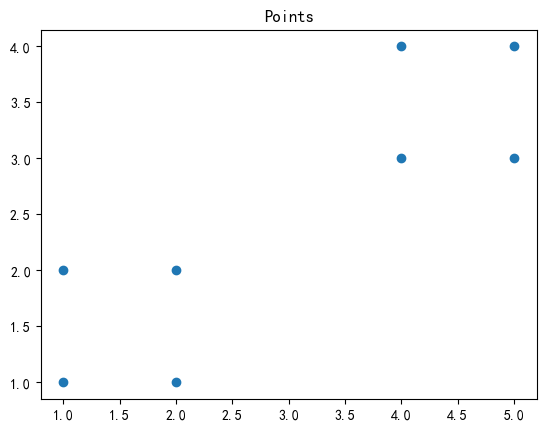

In [38]:
import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1])
plt.title("Points")
plt.show()

#### 聚类

In [39]:
centers = KMeans(points,2)

#### 聚类中心可视化

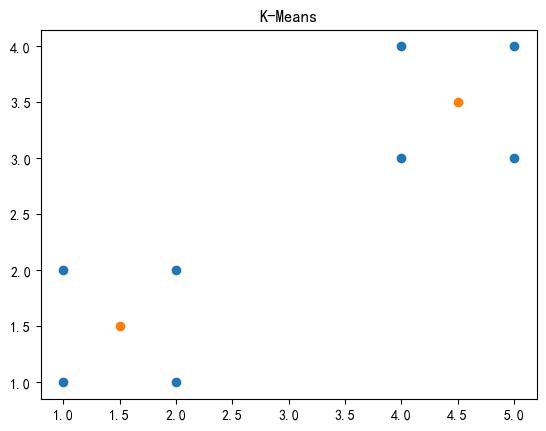

In [40]:
import matplotlib.pyplot as plt
x = [i[0] for i in points]
y = [i[1] for i in points]

a = [i[0] for i in centers]
b = [i[1] for i in centers]

plt.scatter(x,y)
plt.scatter(a,b)
plt.title("K-Means")
plt.show()

## scikitlearn实现

In [56]:
!pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


[[1.5 1.5]
 [3.5 3.5]]
[0 0 0 0 1 1 1 1]


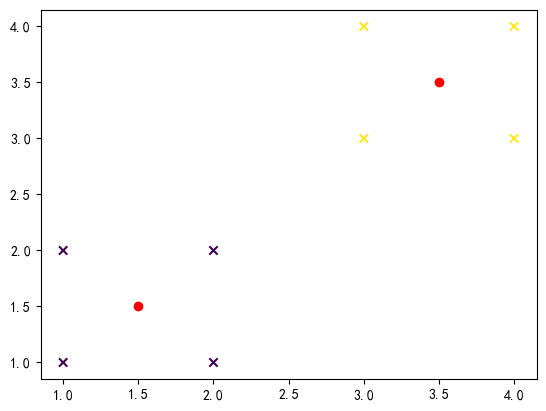

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# 原始数据
data_list = [[1, 1],
        [2, 1],
        [1, 2],
        [2, 2],
        [3, 3],
        [3, 4],
        [4, 3],
        [4, 4]
        ]
data = np.array(data_list)

# K-Means聚类结果
model = KMeans(n_clusters=2, n_init="auto")
result_model = model.fit(data)
kmeans_centers = result_model.cluster_centers_
kmeans_labels = result_model.labels_
print(kmeans_centers)
print(kmeans_labels)

plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, marker='x')
plt.scatter(kmeans_centers[:,0],kmeans_centers[:,1],marker="o",color="red")
plt.show()

> n_init: 获取初始簇中心的更迭次数，为了弥补初始质心的影响，算法默认会初始10次质心，实现算法，然后返回最好的结果;  
> 在低版本的scikit-learn中，不支持设置为"auto"，只支持设置为整数；如设置为"auot"，则会报错，不能使用"<=" 比较整数和字符串。

## K值选择

### 手肘法 

$$
SSE=\sum_{i=1}^{k}\sum_{p\in c_i} \left| p-m \right|^{2}
$$

$c_i$是第$i$个簇，$p$是$c_i$中的样本点，$m$是$c_i$的质心（$c_i$中所有样本的均值），$SSE$是所有样本的聚类误差，代表了聚类效果的好坏。

“肘点”对应的K值被认为是较优的簇数量，因为它在减少误差的同时，并没有大幅增加簇的数量。

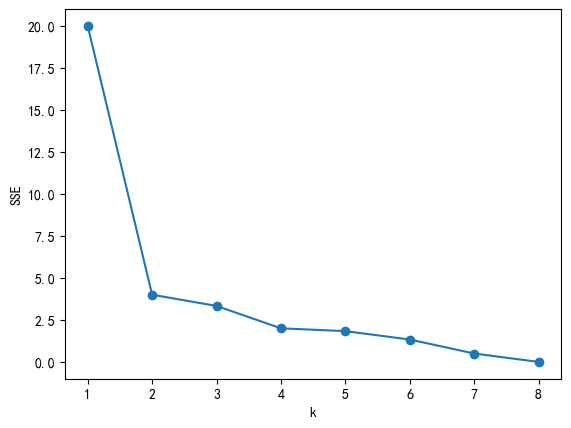

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
SSE = [] # 存放每次结果的误差平方和

for k in range(1,9):

    model = KMeans(n_clusters=k, n_init="auto") # 构造聚类器
    model.fit(data)
    SSE.append(model.inertia_) # 样本到最近的聚类中心的距离的平方和。

X = range(1,9)

plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

### 轮廓系数法(Silhouette Coefficient Index)

#### 高内聚，低耦合

聚类结果的轮廓系数，实际上是样本轮廓系数的平均值。这也就是说聚类样本中的每个样本点对应都有一个轮廓系数值，而总的轮廓系数则是所有样本点轮廓系数的平均值。

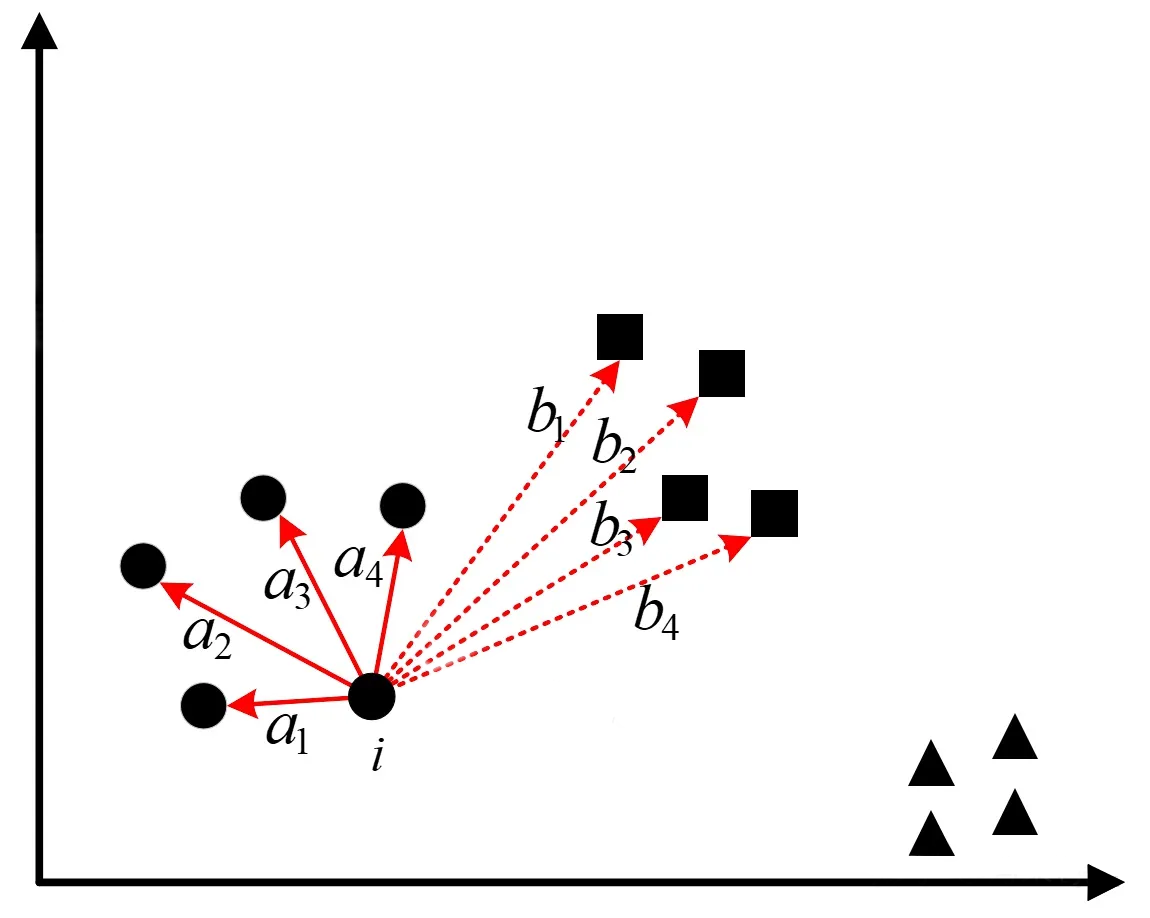

上图中一共有3个簇，样本点$i$现在属于圆形簇，距离最近的簇为方形簇。  

#### 样本点i的轮廓系数
样本点$i$到簇中每个样本点距离的均值为$a(i)$，到最近簇中每个样本距离的均值为$b(i)$，即：
$$
\begin{align}
a(i) &= \frac{a_1 + a_2 + a_3 + a_4}{4} \\ b(i) &= \frac{b_1 + b_2 + b_3 + b_4}{4}
\end{align}$$


此时，样本$i$的轮廓系数$s(i)$定义为:
$$
s(i) = \begin{cases} 1 - \frac{a(i)}{b(i)} &, if \space a(i) < b(i) \\ 0 &, if \space a(i) = b(i) \\ \frac{b(i)}{a(i)} - 1 &,  if \space a(i) > b(i) \end{cases} 
$$

使用一个公式表示三种情况，数据点$i$的轮廓系数 $s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$。

#### 聚类算法的整体轮廓系数
将所有数据点的轮廓系数取平均值，即得到聚类算法的整体轮廓系数。

注意：  
- 对于同一个簇中的每个样本点来说，距离自己最近的簇可能并不是同一个；  
- 在寻找距离当前样本点最近的簇结构时，计算的是**当前样本点**到各个**簇中心**的最短距离，
  而不是计算**当前样本点所在簇的簇中心**到其它各个**簇中心**的最短距离。
- 若某个数据点所在簇的数据点数量小于等于1，则该点的轮廓系数为0。

#### 代码实现

In [61]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
 
def test_silhouette_score(n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init="auto")
    model.fit(data)
    y_pred = model.predict(data)
    # 计算轮廓分数： 所有样本点的轮廓系数的平均值
    score_mean = silhouette_score(data, y_pred)
    # 计算所有样本点的轮廓系数
    score_all = silhouette_samples(data, y_pred)
    print(f"k: {n_clusters}; 轮廓系数: {score_mean}")
    # print(f"所有样本的轮廓系数: {score_all}") # score_mean = sum(score_all)/len(score_all)
 
if __name__ == '__main__':
    for i in range(2,5):
        test_silhouette_score(i)

k: 2; 轮廓系数: 0.5973578058155935
k: 3; 轮廓系数: 0.35473770401956467
k: 4; 轮廓系数: 0.07950487116513402


> silhouette_score是用来计算所有样本轮廓系数平均值  
> silhouette_samples是用来计算聚类模型中每个样本的轮廓系数
> https://www.cnblogs.com/itelephant/p/17329697.html